<a href="https://colab.research.google.com/github/pedroAndrad1/regression_experiments/blob/master/experimento_regressao_casas_preco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Nao tem o dataset online, baixei e salvei no meu drive.
#To pegando o arquivo aqui.
#Esse algoritmo ta no code snippet em insert. 

#Vai precisar fazer isso tambem
#Baixa o csv, upa no seu drive, e coloca em file_id o id que tiver no arquivo.

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1GEPSGJFtZfSqozdfHNnnrDEFNODDODYW'
downloaded= drive.CreateFile({'id': file_id})
downloaded.GetContentFile('kc_house_data.csv') #Essa linha nao esta no snippet, aqui e pra de fato pegar o csv.

#Legenda das colunas do dataset

id: notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/House

sqft_living: square footage of the home

sqft_lots: quare footage of the lot

floors: Total floors (levels) in house

waterfront: House which has a view to a waterfront

view: Has been viewed

condition: How good the condition is ( Overall )

grade: overall grade given to the housing unit, based on King County grading system

sqft_above: square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built: Built Year

yr_renovated: Year when house was renovated

zipcode: zip

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [2]:
import pandas as pd
#Lendo o csv para um dataframe com o pandas.

casas_data = pd.read_csv('kc_house_data.csv')

casas_data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


OK, vou dropar as seguintes colunas: id, date e zipcode. Julguei desnecessarias.
Também vou dropar as colunas sqft_lot e sqft_living. Pois esses valores estão atualizados nas colunas sqft_lot15 e sqft_living15.

In [3]:
#A funcao drop retorna um novo dataframe.
#O parametro axis e para dropar a coluna, o default e linha.
casas_data = casas_data.drop( ['id', 'date', 'zipcode', 'sqft_living', 'sqft_lot'] , axis = 'columns' )
casas_data.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


Vou splitar o dataframe em treino e teste e reescalar os valores das features, tem valores na casas dos milhares e outros na casa das dezenas. 

Usarei o StandardScaler do módulo preprocessing da bilbioteca sklearn para reescalar as features e o train_test_split do módulo model_selection do sklearn para splitar.

Tanto faz a ordem, pois o train_test_split aceita tanto um pandas dataframe quanto um array como paramêtro.

docs:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html

In [0]:
import numpy as np
#Os random_state chamam essa funcao por debaixo dos panos.
#Setando isso aqui, nao preciso colocar o random_state pra tudo que for fazer.
np.random.seed(0) 

In [0]:
from sklearn.preprocessing import StandardScaler

#Vou separar logo o dataframe em x e y, features e classes.

x = casas_data[ ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
               'sqft_above','sqft_basement','yr_built', 'yr_renovated', 'lat',
               'long', 'sqft_living15', 'sqft_lot15'] ]
y = casas_data['price']


from sklearn.model_selection import train_test_split
#Como existem multiplos valores de y, nao faz sentido extratificar.

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

#Reescalando as features
scaler = StandardScaler()
x_treino_s = scaler.fit_transform(x_treino , y = y)
x_teste_s = scaler.fit_transform(x_teste, y = y)




Vou usar um dummy do sklearn para ser nosso modelo de baseline

doc:
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [6]:
from sklearn.dummy import DummyRegressor

#O Dummy tem varias maneiras de fazer os predict's.
#Vou escolher dois e ver qual tem a maior acuracia.
#Esse sera o baseline

dummy_mean= DummyRegressor(strategy = "mean")
dummy_median = DummyRegressor(strategy = "median")

#Treinando os dummies

dummy_mean.fit(x_treino_s, y_treino)
dummy_median.fit(x_treino_s, y_treino)

#Vendo as acuracias

acuracia_mean = dummy_mean.score(x_teste_s, y_teste)
acuracia_median = dummy_median.score(x_teste_s, y_teste)

print(acuracia_mean)
print(acuracia_median)

#A documentacao diz que poder dar negativo, mas nao entendi oq isso significa.
#Bom, de acordo com a documentacao, quanto mais perto de um melhor.
#Logo, o baseline seria uma acuracia de 0. 
#Muito estranho, esperava um numero positivo.

-0.0003331762965164131
-0.05135901001470456


Vou tentar fazer sem escalar as features.

In [7]:
dummy_mean= DummyRegressor(strategy = "mean")
dummy_median = DummyRegressor(strategy = "median")

#Treinando os dummies

dummy_mean.fit(x_treino, y_treino)
dummy_median.fit(x_treino, y_treino)

#Vendo as acuracias

acuracia_mean = dummy_mean.score(x_teste, y_teste)
acuracia_median = dummy_median.score(x_teste, y_teste)

print(acuracia_mean)
print(acuracia_median)

-0.0003331762965164131
-0.05135901001470456


Ok, o resultado continua negativo. Bom, vou manter com as features escaladas.

Nosso baseline será de 0%.

Depois desses resultados peculiares, vou fazer a regressão com a classe LinearRegression.

A gente pode tentar outras classes de regressão depois:

Aqui uma lista, olha no módulo de linear_model:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Aqui o doc do LinearRegression:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression

modelo_linear = LinearRegression()

modelo_linear.fit(x_treino_s, y_treino)
modelo_linear.score(x_teste_s, y_teste)



0.6831635470401054

Olha só, em torno de 68% de acurácia é um número até expressivo.
Eu estava muito recesoso do que iria sair dai depois dos Dummy's kk.

Vou plotar um gráfico de dispersão usando o seaborn. O eixo serão o predict do modelo e o y será o y_teste

https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot



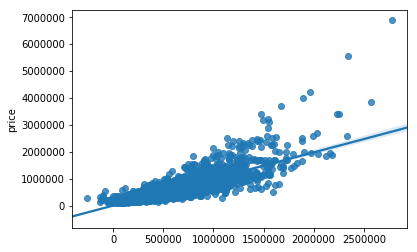

In [9]:
import seaborn as sns

predict = modelo_linear.predict(x_teste_s)

sns.regplot(x = predict, y = y_teste, data = casas_data)


Curiosamente, a acuracia usando as features escaladas
e a acuracia usando as não escaladas é supreendemente parecida, praticamente igual.


In [10]:
modelo_linear.fit(x_treino, y_treino)
modelo_linear.score(x_teste, y_teste)

0.6844632168041367

Vamos testar agora com outros modelos.

Vou testar agora com o LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(solver = "lbfgs")

modelo_logistico.fit(x_treino_s, y_treino)
modelo_logistico.score(x_teste_s, y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.013693560325684678

O LogisticRegression além de demorar muito, tem uma acurácia horrível.

Vou testar agora, o LogisticRegressionCV

In [12]:
from sklearn.linear_model import LogisticRegressionCV

modelo_logistico_cv = LogisticRegression(solver = "lbfgs")

modelo_logistico_cv.fit(x_treino_s, y_treino)
modelo_logistico_cv.score(x_teste_s, y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.013693560325684678

Horrivel também. Regressão logística realmente não é o caminho.

Vou tentar a DecisonTreeRegressor.

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Uma coisa legal de árvore de decisão é que ela trabalha bem com valores fora de escala.
Por isso, vou usar os valores fora de escala. Fica melhor para plotar  a árvore de decisão depois.

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 9 )

tree.fit(x_treino_s, y_treino)
tree.score(x_teste_s, y_teste)

0.7528670308360226

A acuracia muda em função da altura máxima da árvore.

*   Sendo 3, a acurácia fica por volta de 55%. O que não é melhor que o LinearRegressor
*   De 5 em diante, a acurácia fica na casa de 70%.
*   A profundidade igual a 9 se provou a com melhor acurácia, 78%. Mas a visualização da árvore de decisão fica muito ruim.

A profundidade máxima para melhor visualizção da árvore de decisão é igual a 3.



Vou plotar a árvore de decisão.

Usarei o export_graphviz do mesmo módulo da DecisionTreeRegressor para exportar as informções para plotagem e usarei o a biblioteca graphviz para plotar a partir das informações.

docs:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://graphviz.readthedocs.io/en/stable/api.html#source



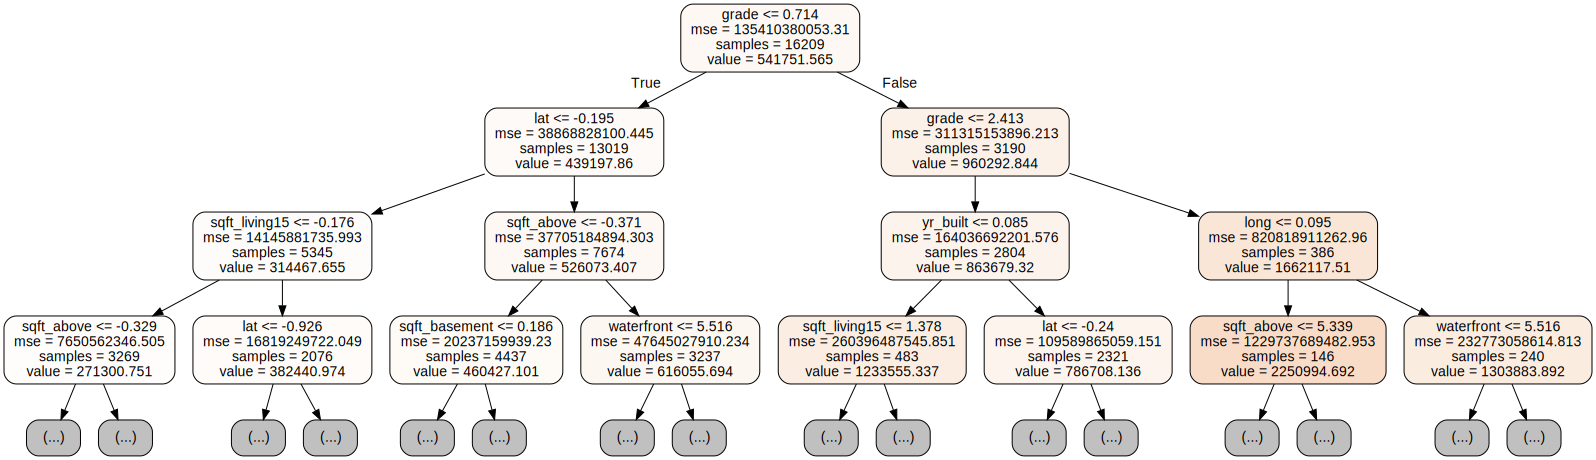

In [14]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

dot_data = export_graphviz(tree, feature_names = features,
                           filled = True, rounded = True, max_depth = 3)

arvore_de_decisao = graphviz.Source(dot_data)
arvore_de_decisao
